In [191]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [192]:
df = pd.read_excel("hack.xlsx")
fur = df

In [193]:
fur['date'].min(), fur['date'].max()

(Timestamp('2010-01-15 00:00:00'), Timestamp('2020-12-15 00:00:00'))

In [194]:
fur = fur.groupby('date')['production'].sum().reset_index()

In [195]:
fur = fur.set_index('date')
fur.index

DatetimeIndex(['2010-01-15', '2010-02-15', '2010-03-15', '2010-04-15',
               '2010-05-15', '2010-06-15', '2010-07-15', '2010-08-15',
               '2010-09-15', '2010-10-15',
               ...
               '2020-03-15', '2020-04-15', '2020-05-15', '2020-06-15',
               '2020-07-15', '2020-08-15', '2020-09-15', '2020-10-15',
               '2020-11-15', '2020-12-15'],
              dtype='datetime64[ns]', name='date', length=132, freq=None)

In [200]:
y = fur['production'].resample('MS').mean()

In [201]:
#y = fur['production']

In [202]:
y['2019':]

date
2019-01-01    5.645316e+07
2019-02-01    4.939980e+07
2019-03-01    5.548300e+07
2019-04-01    5.732852e+07
2019-05-01    5.936725e+07
2019-06-01    5.562328e+07
2019-07-01    5.581212e+07
2019-08-01    5.227371e+07
2019-09-01    5.243995e+07
2019-10-01    5.969759e+07
2019-11-01    5.624545e+07
2019-12-01    5.108674e+07
2020-01-01    5.799813e+07
2020-02-01    5.342516e+07
2020-03-01    2.989315e+07
2020-04-01    1.965843e+06
2020-05-01    7.298516e+06
2020-06-01    3.373311e+07
2020-07-01    5.105971e+07
2020-08-01    5.098228e+07
2020-09-01    5.597517e+07
2020-10-01    5.660369e+07
2020-11-01    5.681816e+07
2020-12-01    5.058631e+07
Freq: MS, Name: production, dtype: float64

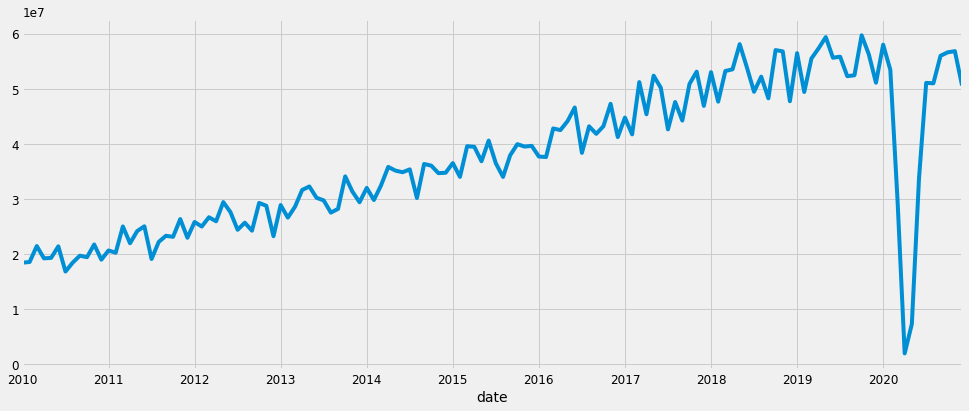

In [203]:
y.plot(figsize=(15, 6))
plt.show()

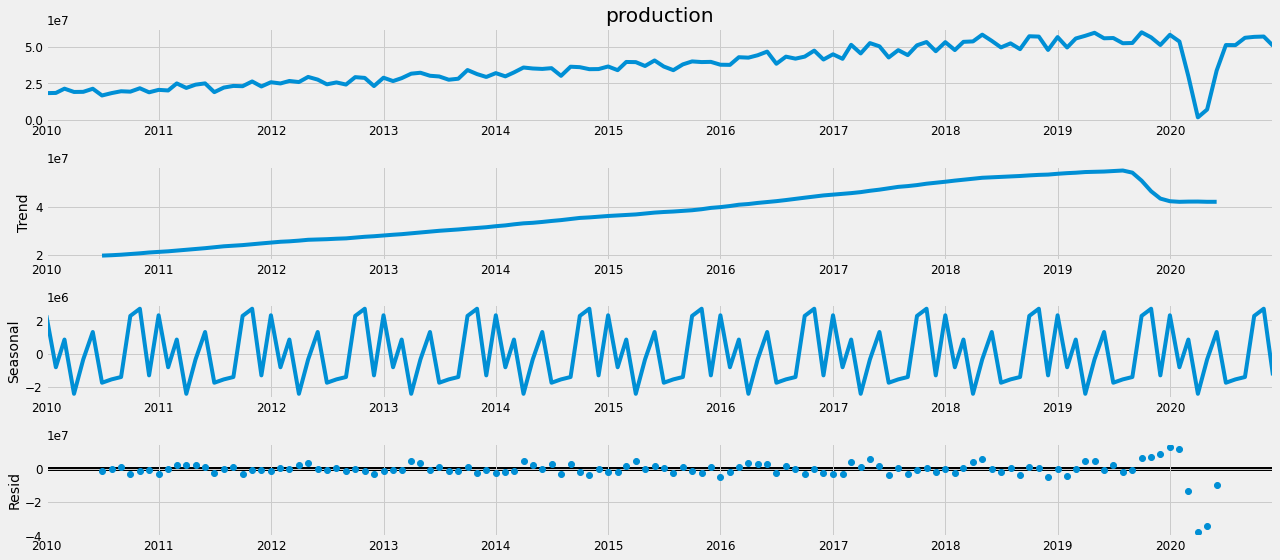

In [204]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [205]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [206]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4957.0673620529315
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4442.637185973572
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4144.550727710182
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3735.2047202290537
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4177.107914265947
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4143.737713551844
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3762.9814767603643
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3733.521942675127
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4829.167795676605
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4364.625140923707
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4027.3628035333813
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3627.5655082613202
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4426.6673107295055
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4354.975740365275
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3694.529733911161
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3629.3075492337757
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4416.585304638157
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4007.945338008821
ARI

In [207]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7298      0.052    -14.016      0.000      -0.832      -0.628
ma.L1          0.9346      0.045     20.621      0.000       0.846       1.023
ar.S.L12      -0.0161      0.268     -0.060      0.952      -0.542       0.509
sigma2      3.398e+13   9.88e-16   3.44e+28      0.000     3.4e+13     3.4e+13


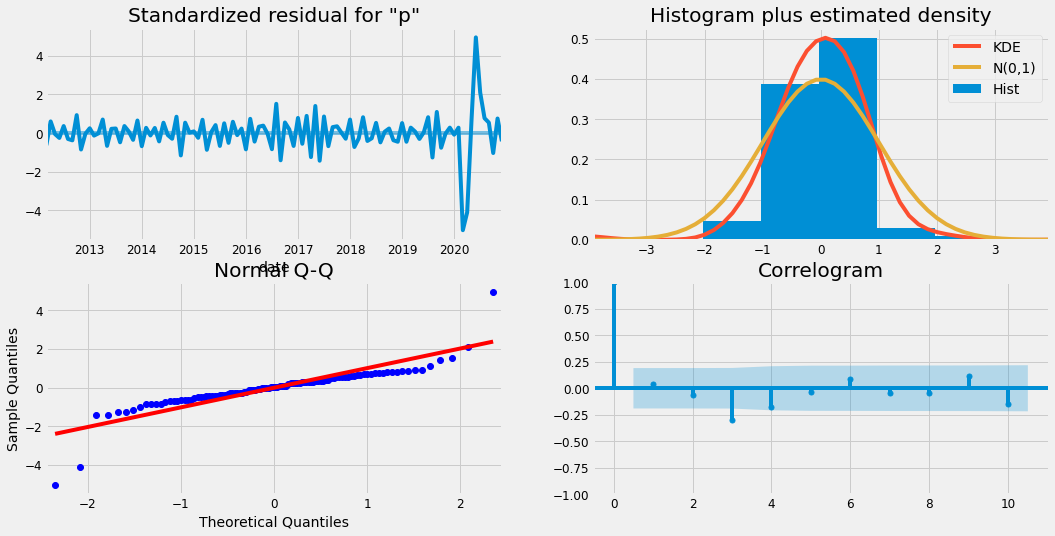

In [208]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

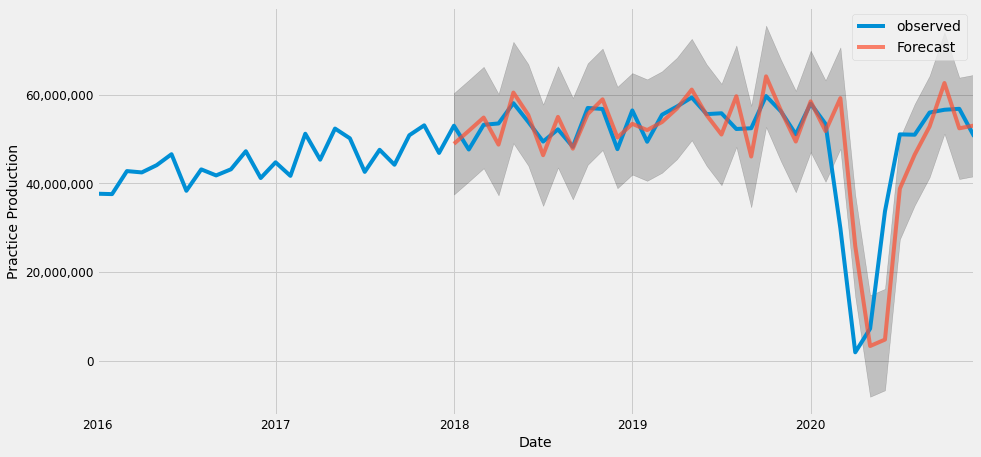

In [209]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Practice Production')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.show()

In [210]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-09-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Mean Squared Error of our forecasts is 17913929504271.62


In [212]:
def mean_absolute_percentage_error(y_truth, y_forecasted):
      return np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100
f2 = mean_absolute_percentage_error(y_truth, y_forecasted)
print ('MAPE=',f2)    

MAPE= 7.2245704171955865


In [213]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4232485.03


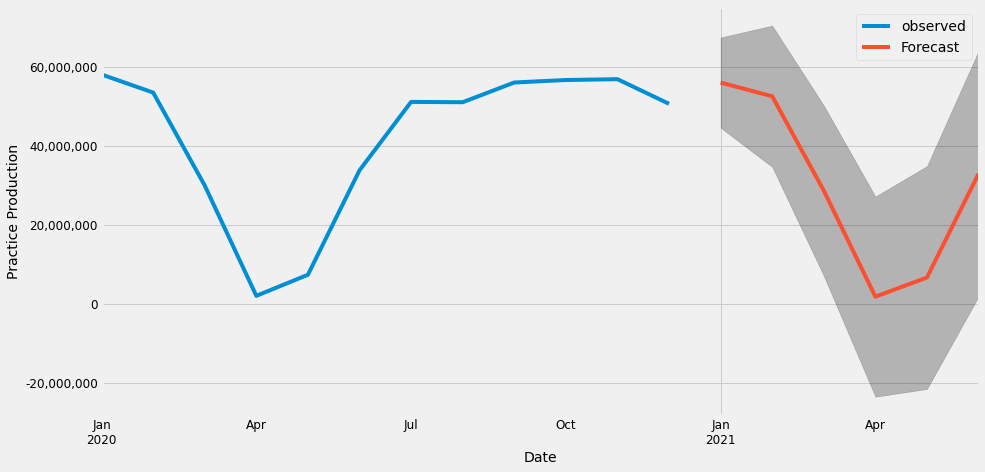

In [221]:
pred_uc = results.get_forecast(steps=6)
pred_ci = pred_uc.conf_int()
ax = y['2020':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Practice Production')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend()
plt.show()
